In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 20})

In [2]:
y_train = np.load('../data/train_test_sets/y_train.npy')
y_test = np.load('../data/train_test_sets/y_test.npy')
X_train = np.load('../data/train_test_sets/X_train.npy')
X_test = np.load('../data/train_test_sets/X_test.npy')
X_train_standard = np.load('../data/train_test_sets/X_train_standard.npy')
X_test_standard = np.load('../data/train_test_sets/X_test_standard.npy')
X_train_pow = np.load('../data/train_test_sets/X_train_pow.npy')
X_test_pow = np.load('../data/train_test_sets/X_test_pow.npy')

### Linear Regression 

First, we will try out a linear regression model. It is not likely that this model will perform well, as the data does not seem to fit well linearly. However, we can use this model as a comparison for the others we will try out later (Random Forest and K-nearest neighbors). 

In [7]:
from sklearn.linear_model import LinearRegression 

lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_train, y_train)

0.47295785654098654

In [8]:
#we can see that it has a fairly poor R^2 score when fit with the raw data
#let's try with the scaled data

lin_standard = LinearRegression()
lin_standard.fit(X_train_standard, y_train)
lin_standard.score(X_train_standard, y_train)

0.4729577127394877

In [10]:
lin_pow = LinearRegression()
lin_pow.fit(X_train_pow, y_train)
lin_pow.score(X_train_pow, y_train)

0.4833574116798446

In [11]:
#the log scaled data has overall the highest R^2 value, interestingly 
#let's calculate the mean absolute error from these models 
from sklearn.metrics import mean_absolute_error

y_preds_lin = lin.predict(X_test)
y_preds_lin_standard = lin_standard.predict(X_test_standard)
y_preds_lin_pow = lin_pow.predict(X_test_pow)

print(f'MAE of linear regression model with non-transformed data:' + str(mean_absolute_error(y_test, 
                                                                                             y_preds_lin)))
print(f'MAE of linear regression model with standardized data:' + str(mean_absolute_error(y_test, 
                                                                                          y_preds_lin_standard)))
print(f'MAE of linear regression model with log-transformed data:' + str(mean_absolute_error(y_test, 
                                                                                             y_preds_lin_pow)))

MAE of linear regression model with non-transformed data:31.971286647384083
MAE of linear regression model with standardized data:31.97118199548074
MAE of linear regression model with log-transformed data:31.588328504289535


The best of these models is the linear regression model that uses the log-transformed data. 
It has a MAE of 31.59, which means that for a given compound, it can predict the standard melting temperature 
with a mean average accuracy within 31.59 degrees Kelvin, which is well within the literature standards. 
note that from the paper (https://pubs.acs.org/doi/10.1021/acs.jcim.3c00308), their best model had an MAE of 
28.1, and their worst had an MAE of 39

In [12]:
from sklearn.metrics import mean_squared_error

print(f'RMSE of Linear Regression with Default Settings:' + str(mean_squared_error(y_test, 
                                                                                   y_preds_lin_standard, 
                                                                                   squared=False)))

RMSE of Linear Regression with Default Settings:41.4473360451024


In [17]:
linear_preds_df = pd.DataFrame(zip(list(y_test.reshape(-1)), list(y_preds_lin_standard)), 
                               columns=['y_test', 'linear_preds'])

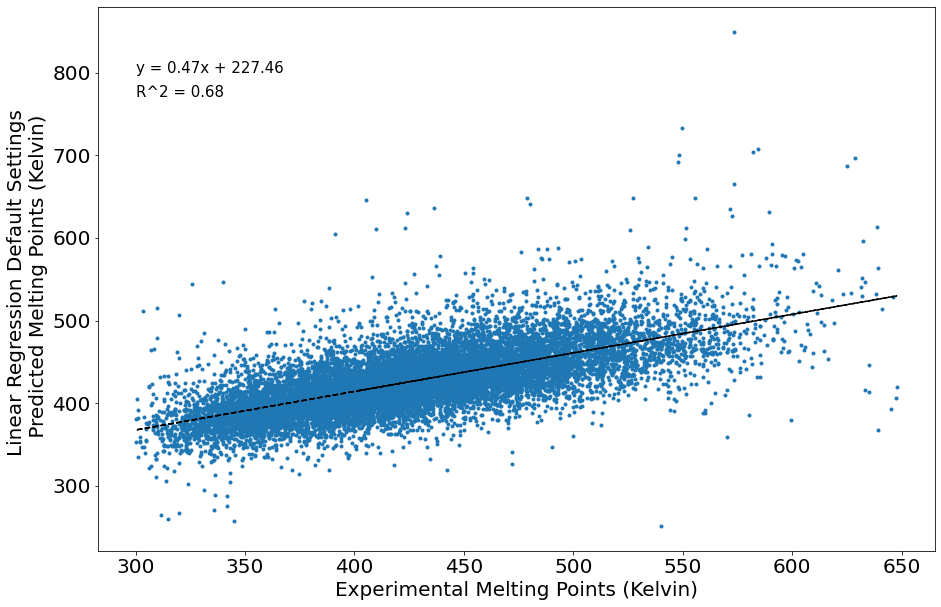

In [22]:
from scipy.stats import linregress

x2 = np.array(linear_preds_df['y_test'].to_list()).reshape(-1)
y2 = np.array(linear_preds_df['linear_preds'].to_list()).reshape(-1)

a2, b2, rvalue2, pvalue2, stderr2 = linregress(x2, y2)

plt.figure(figsize=(15,10))
plt.plot(x2, y2, marker='.', linestyle='None')
plt.plot(x2, a2*x2+b2, color='black', linestyle='--')
plt.text(300, 800, s=f'y = {round(a2, 2)}x + {round(b2, 2)}', fontsize=15)
plt.text(300, 770, s=f'R^2 = {round(rvalue2, 2)}', fontsize=15)
plt.xlabel('Experimental Melting Points (Kelvin)')
plt.ylabel('Linear Regression Default Settings \n Predicted Melting Points (Kelvin)')
plt.show();

### Random Forest 

First, we will try with the default settings, and then we will tune the hyperparameters using GridSearch as well as cross-fold validation. 

In [8]:
from sklearn.ensemble import RandomForestRegressor 

RF = RandomForestRegressor()
RF.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [10]:
y_preds_RF = RF.predict(X_test)
print(f'MAE of Random Forest Regressor with Default Settings:' + str(mean_absolute_error(y_test, y_preds_RF)))

MAE of Random Forest Regressor with Default Settings:30.166555795981992


In [23]:
from sklearn.ensemble import RandomForestRegressor 
RF_standard = RandomForestRegressor()
RF_standard.fit(X_train_standard, y_train.ravel())
y_preds_RF_standard = RF_standard.predict(X_test_standard)
print(f'MAE of Random Forest Regressor with Default Settings:' + str(mean_absolute_error(y_test, 
                                                                                         y_preds_RF_standard)))

MAE of Random Forest Regressor with Default Settings:30.191406474037997


In [25]:
print(f'RMSE of Random Forest Regressor with Default Settings:' + str(mean_squared_error(y_test, 
                                                                                         y_preds_RF_standard, 
                                                                                         squared=False)))

RMSE of Random Forest Regressor with Default Settings:39.408269100159764


In [14]:
RF_pow = RandomForestRegressor()
RF_pow.fit(X_train_pow, y_train.ravel())
y_preds_RF_pow = RF_pow.predict(X_test_pow)
print(f'MAE of Random Forest Regressor with Default Settings:' + str(mean_absolute_error(y_test, y_preds_RF_pow)))

MAE of Random Forest Regressor with Default Settings:30.11465170721728


In [26]:
RF_preds_df = pd.DataFrame(zip(list(y_test.reshape(-1)), list(y_preds_RF_standard)), 
                           columns=['y_test', 'RF_preds'])

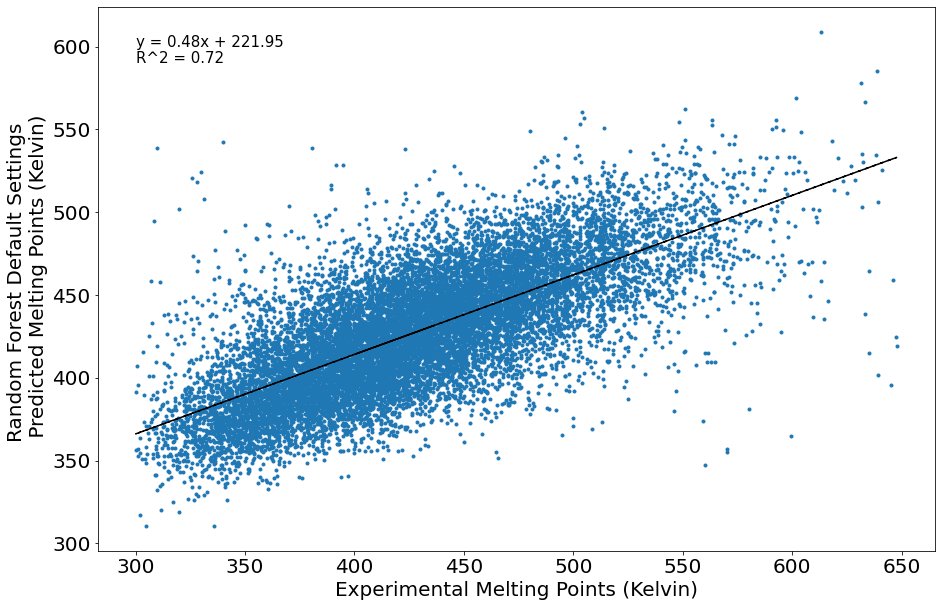

In [27]:
x = np.array(RF_preds_df['y_test'].to_list())
y = np.array(RF_preds_df['RF_preds'].to_list())

a, b, rvalue, pvalue, stderr = linregress(x, y)

plt.figure(figsize=(15,10))
plt.plot(x, y, marker='.', linestyle='None')
plt.plot(x, a*x+b, color='black', linestyle='--')
plt.text(300, 600, s=f'y = {round(a, 2)}x + {round(b, 2)}', fontsize=15)
plt.text(300, 590, s=f'R^2 = {round(rvalue, 2)}', fontsize=15)
plt.xlabel('Experimental Melting Points (Kelvin)')
plt.ylabel('Random Forest Default Settings \n Predicted Melting Points (Kelvin)')
plt.show();

In [28]:
scores = {0:{'model':'Linear', 'data':'Unscaled', 'R^2':0.47295785654098654, 'MAE':31.971286647384083}, 
          1:{'model':'Linear', 'data':'Standardized', 'R^2':0.4729577127394877, 'MAE':31.97118199548074}, 
          2:{'model':'Linear', 'data':'Log Scaled', 'R^2':0.4833574116798446, 'MAE':31.588328504289535}, 
          3:{'model':'Random Forest', 'data':'Unscaled', 'MAE':30.166555795981992}, 
          4:{'model':'Random Forest', 'data':'Standardized', 'MAE':30.076039717817284}, 
          5:{'model':'Random Forest', 'data':'Log Scaled', 'MAE':30.11465170721728}}

scores_df = pd.DataFrame(scores).T

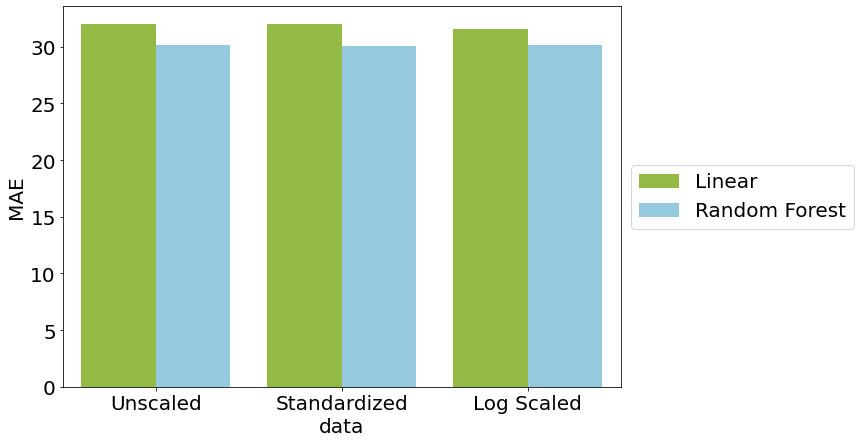

In [29]:
colors = {'Linear':'yellowgreen', 'Random Forest':'skyblue'}
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
ax = sns.barplot(data=scores_df, x='data', y='MAE', hue='model', palette=colors)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Parameter/Hyperparameter Tuning

We can see that using the Random Forest Regressor with default settings and the 
standardized data gives the best result, even if only by a little. Now it is time to tune the parameters of the model. We will tune:
1. number of trees in the forest (n_estimators)
2. max depth of each tree (max_depth)
3. number of features to consider at every split (max_features)
5. minimum number of samples required to split a node (min_samples_split)
6. minimum number of samples required at each leaf node (min_samples_leaf)


other parameters we will try:
1. n_jobs (for speeding up processing)

To do this, we will use a combination of random search (rather than grid search, which will take a longer time) as well as cross-fold validation. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(200, 2000, num=10)]
#print(n_estimators)

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
#print(max_depth)

max_features = ['auto', 'sqrt']

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 
               'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

print(random_grid)

In [27]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=100, cv=3, 
                               random_state=42, n_jobs=-1)

rf_random.fit(X_train_standard, y_train.ravel())

/Users/gracenye/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [28]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [29]:
best_random = rf_random.best_estimator_

In [30]:
y_preds_random = best_random.predict(X_test_standard)

In [31]:
print(f'MAE of Random Forest Regressor with RandomizedSearchCV Settings:' + str(mean_absolute_error(y_test, y_preds_random)))

MAE of Random Forest Regressor with RandomizedSearchCV Settings:29.979828268461738


In [35]:
#this is a very slight increase from our first random forest model 

cv_results = rf_random.cv_results_
df = pd.DataFrame(cv_results)
df.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
97,3303.904064,16.806547,5.608420,0.364001,1600,2,1,auto,30,"{'n_estimators': 1600, 'min_samples_split': 2,...",0.513790,0.508438,0.522693,0.514974,0.005880,1
85,3348.919366,12.114185,7.902291,0.206181,1600,2,1,auto,50,"{'n_estimators': 1600, 'min_samples_split': 2,...",0.513349,0.508204,0.522507,0.514687,0.005916,2
72,2089.690481,5.552029,4.589773,0.087935,1000,2,1,auto,40,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.513081,0.508774,0.521871,0.514575,0.005450,3
36,2996.685270,12.343724,4.895833,0.029756,1600,5,2,auto,100,"{'n_estimators': 1600, 'min_samples_split': 5,...",0.512885,0.508403,0.522344,0.514544,0.005811,4
18,2327.956376,95.462434,3.705391,0.068883,1200,5,2,auto,110,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.513572,0.507436,0.522582,0.514530,0.006220,5
46,1529.311870,4.527480,2.545945,0.028644,800,2,2,auto,80,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.512574,0.508388,0.521798,0.514253,0.005602,6
37,1127.099051,5.179315,1.838342,0.023555,600,5,2,auto,None,"{'n_estimators': 600, 'min_samples_split': 5, ...",0.512754,0.507660,0.522174,0.514196,0.006012,7
3,1537.640322,3.562642,2.643934,0.036041,800,2,2,auto,70,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.512803,0.507416,0.521995,0.514071,0.006019,8
61,3690.832924,143.845519,7.438433,0.238052,1800,2,1,auto,20,"{'n_estimators': 1800, 'min_samples_split': 2,...",0.512759,0.507789,0.521654,0.514068,0.005736,9
22,2335.852363,3.519367,3.693652,0.024230,1200,5,1,auto,90,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.512751,0.507733,0.521618,0.514034,0.005741,10


One thing that we need to keep in mind is the balance between fit time and training time. If we look at the above printout, we can see that the model with 600 estimators has the shortest train and fit time. If we were thinking about deploying this, we might go for something with a shorter fit time.

In [ ]:
df.to_csv('../modeling/validation/randomforest_randomcv.csv')

In [3]:
df = pd.read_csv('../modeling/validation/randomforest_randomcv.csv', index_col=0)
df.sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
97,3303.904064,16.806547,5.608420,0.364001,1600,2,1,auto,30.0,"{'n_estimators': 1600, 'min_samples_split': 2,...",0.513790,0.508438,0.522693,0.514974,0.005880,1
85,3348.919366,12.114185,7.902291,0.206181,1600,2,1,auto,50.0,"{'n_estimators': 1600, 'min_samples_split': 2,...",0.513349,0.508204,0.522507,0.514687,0.005916,2
72,2089.690481,5.552029,4.589773,0.087935,1000,2,1,auto,40.0,"{'n_estimators': 1000, 'min_samples_split': 2,...",0.513081,0.508774,0.521871,0.514575,0.005450,3
36,2996.685270,12.343724,4.895833,0.029756,1600,5,2,auto,100.0,"{'n_estimators': 1600, 'min_samples_split': 5,...",0.512885,0.508403,0.522344,0.514544,0.005811,4
18,2327.956376,95.462434,3.705391,0.068883,1200,5,2,auto,110.0,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.513572,0.507436,0.522582,0.514530,0.006220,5


In [3]:
from sklearn.ensemble import RandomForestRegressor 

RF_best = RandomForestRegressor(n_estimators=1600, min_samples_split=2, min_samples_leaf=1, 
                                max_features='auto', max_depth=30)

RF_best.fit(X_train_standard, y_train.ravel())

RandomForestRegressor(max_depth=30, n_estimators=1600)

In [4]:
RF_best_preds = RF_best.predict(X_test_standard)

In [31]:
print(f'MAE of Random Forest Regressor with Best Settings:' + str(mean_absolute_error(y_test, RF_best_preds)))
print(f'RMSE of Random Forest Regressor with Best Settings:' + str(mean_squared_error(y_test, 
                                                                                      RF_best_preds, 
                                                                                      squared=False)))

MAE of Random Forest Regressor with Best Settings:29.992063082874544
RMSE of Random Forest Regressor with Best Settings:39.13266430373589


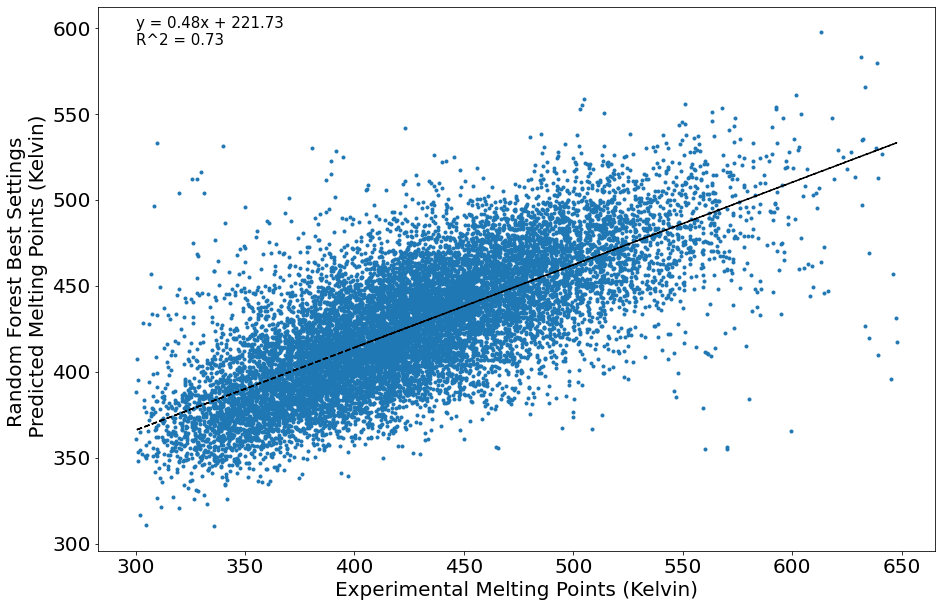

In [32]:
RF_best_preds_df = pd.DataFrame(zip(list(y_test.reshape(-1)), list(RF_best_preds)), 
                                columns=['y_test', 'RF_best_preds'])

x3 = np.array(RF_best_preds_df['y_test'].to_list())
y3 = np.array(RF_best_preds_df['RF_best_preds'].to_list())

a3, b3, rvalue3, pvalue3, stderr3 = linregress(x3, y3)

plt.figure(figsize=(15,10))
plt.plot(x3, y3, marker='.', linestyle='None')
plt.plot(x3, a3*x3+b3, color='black', linestyle='--')
plt.text(300, 600, s=f'y = {round(a3, 2)}x + {round(b3, 2)}', fontsize=15)
plt.text(300, 590, s=f'R^2 = {round(rvalue3, 2)}', fontsize=15)
plt.xlabel('Experimental Melting Points (Kelvin)')
plt.ylabel('Random Forest Best Settings \n Predicted Melting Points (Kelvin)')
plt.show();

## Solubility Prediction with GSE

Now I will evaluate this model using MAE (mean squared error) and RMSE (root mean squared error) in terms of its predictive power for the standard melting temperature of a molecule. Then we will apply this to calculating the solubility of each molecule and calculate error for that. 

We will then also take a look at the features that were most important for model performance. 

In [33]:
def gse(MP, logP):
    return 0.5 - 0.01*(MP-25) - logP

In [34]:
ext_val = pd.read_csv('../data/intermediate/ext_validation_descriptors.csv', index_col=0)
solubility = pd.read_csv('../data/intermediate/solubility.csv')
ext_val.head()

,SMILES,Name,logS_expr,LogP_ACD,SFI,dataset,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,size
0,FC=1C=NC(=NC1C=2C=C(F)C=3N=C(N(C3C2)C(C)C)C)NC...,Abemaciclib,-4.250,3.277,3.8,one,4.303889,0.309265,4.303889,0.309265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
0,CCCC(CC)COC(=O)CCc1cc(c(c(c1)C(C)(C)C)O)C(C)(C)C,PJZFNEYJOZUEGS-UHFFFAOYSA-N,-7.099,7.068,8.1,five,4.303889,0.309265,4.303889,0.309265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
0,Cc1c(scn1)c2ccc(c(c2)OCCOc3ccc(cc3)CN4CCN(CC4)...,ACBI1,-6.140,3.139,2.6,six,4.303889,0.309265,4.303889,0.309265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
0,CC(=O)Nc1nnc(s1)S(=O)(=O)N,Acetazolamide,-2.380,-0.313,0.1,two,4.303889,0.309265,4.303889,0.309265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium
0,c1cc(ccc1C(C(CO)NC(=O)C(Cl)Cl)O)N(=O)=O,chloramphenicol,-1.940,0.855,1.9,three,4.303889,0.309265,4.303889,0.309265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,medium


In [35]:
ext_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9871 entries, 0 to 8612
Columns: 212 entries, SMILES to size
dtypes: float64(208), object(4)
memory usage: 16.0+ MB


In [36]:
descriptors_df = solubility.drop(['CID', 'std_temp', 'FP', 'size'], axis='columns')
descriptors_2d = list(descriptors_df.columns)
print(descriptors_2d)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', '

In [37]:
X_val = np.array(ext_val[descriptors_2d])

In [38]:
#however, we also need to standardize our data the same way we standardized the training and test data

from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

SS_scaler.fit(X_train)
X_val_standard = SS_scaler.transform(X_val)

In [39]:
val_preds = RF_best.predict(X_val_standard)

In [40]:
ext_val['RF_best_std_temp_preds'] = val_preds

In [41]:
logS_preds = []
for index,row in ext_val.iterrows():
    mp = row['RF_best_std_temp_preds']
    logp = row['MolLogP']
    logS = gse(mp, logp)
    logS_preds.append(logS)
    
ext_val['logS_preds'] = logS_preds

In [42]:
print(f'MAE of Random Forest Regressor with Best Settings:' + str(mean_absolute_error(ext_val['logS_expr'], 
                                                                                      ext_val['logS_preds'])))
print(f'RMSE of Random Forest Regressor with Best Settings:' + str(mean_squared_error(ext_val['logS_expr'],
                                                                                      ext_val['logS_preds'], 
                                                                                      squared=False)))

MAE of Random Forest Regressor with Best Settings:2.7924284888412423
RMSE of Random Forest Regressor with Best Settings:3.1725143729821634


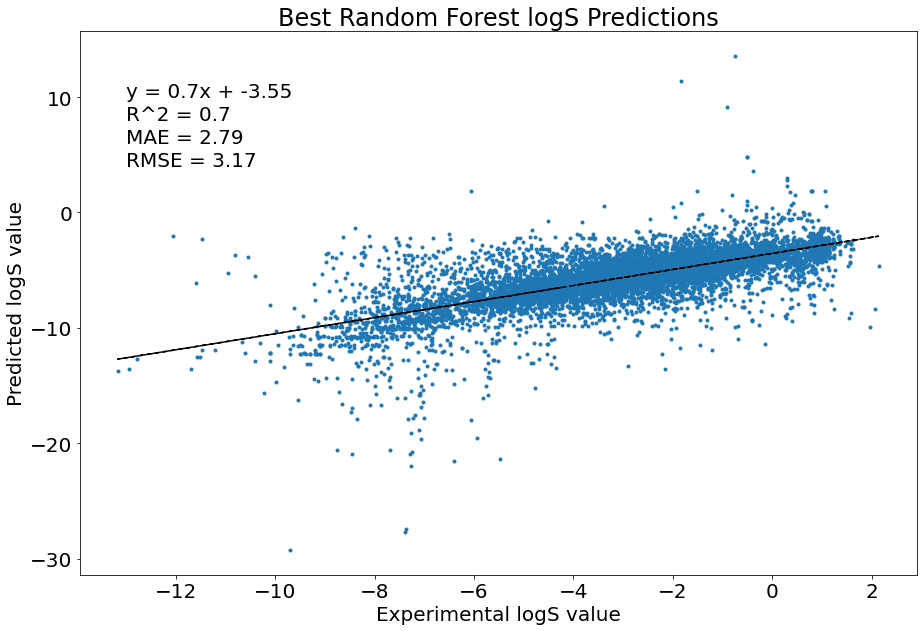

In [83]:
x4 = np.array(ext_val['logS_expr'])
y4 = np.array(ext_val['logS_preds'])

a4, b4, rvalue4, pvalue4, stderr4 = linregress(x4, y4)
mae4 = mean_absolute_error(x4, y4)
rmse4 = mean_squared_error(x4, y4, squared=False)

plt.figure(figsize=(15,10))
plt.plot(x4, y4, marker='.', linestyle='None')
plt.plot(x4, a4*x4+b4, color='black', linestyle='--')
plt.text(-13, 10, s=f'y = {round(a4, 2)}x + {round(b4, 2)}', fontsize=20)
plt.text(-13, 8, s=f'R^2 = {round(rvalue4, 2)}', fontsize=20)
plt.text(-13, 6, s=f'MAE = {round(mae4, 2)}', fontsize=20)
plt.text(-13, 4, s=f'RMSE = {round(rmse4, 2)}', fontsize=20)
plt.xlabel('Experimental logS value')
plt.ylabel('Predicted logS value')
plt.title('Best Random Forest logS Predictions')
plt.show();

### Molecule Size

In [84]:
## for solubility 
molecule_sizes = []
maes = []

for molecule_size, group in ext_val.groupby('size'):
    x = np.array(group['logS_expr'])
    y = np.array(group['logS_preds'])
    
    mae = mean_absolute_error(x, y)
    molecule_sizes.append(molecule_size)
    maes.append(mae)
    
size_mae_df = pd.DataFrame(zip(molecule_sizes, maes), columns=['Size', 'MAE'])

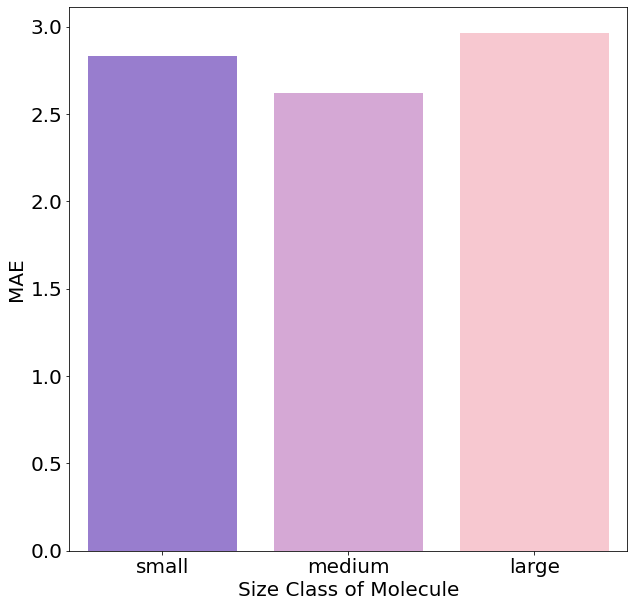

In [87]:
my_colors = {'small':'mediumpurple', 'medium':'plum', 'large':'pink'}

plt.figure(figsize=(10,10))
sns.barplot(data=size_mae_df, x='Size', y='MAE', hue='Size', palette=my_colors, legend=False, 
            order=['small', 'medium', 'large'])
plt.xlabel('Size Class of Molecule')
plt.show();